<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/PytorchTutorial2__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [莫凡Pytorch教程（二）：Pytorch回归模型搭建](https://juejin.cn/post/7089612360226177037)



In [28]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)   # x data (tensor), shape=(100, 1)
#x = torch.linspace(-1, 1, 100)
y = x.pow(2) + 0.2*torch.rand(x.size())                  # noisy y data (tensor), shape=(100, 1)

print("x.shape:", x.shape)
print("y.shape:", y.shape)

x.shape: torch.Size([100, 1])
y.shape: torch.Size([100, 1])


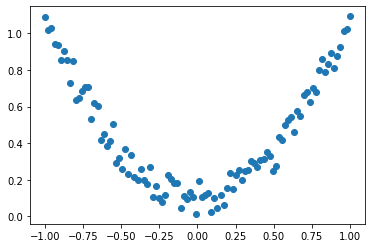

In [46]:
# Scatter with matplotlib
plt.scatter(x, y)
plt.show()

# Scatter with Plotly
#fig = go.Figure(layout=go.Layout(width=500, height=500))
#fig.add_trace(go.Scatter(y=y[:,0], x=x[:,0], mode='markers'))
fig = px.scatter(y=y[:,0], x=x[:,0])
fig.show()

In [26]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # 分别表示feature个数、隐藏层神经元数个数、输出值数目
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        # x 是输入数据
        x = F.relu(self.hidden(x))
        y = self.predict(x)
        return y

In [51]:
net = Net(1, 11, 1)
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)  
loss_func = torch.nn.MSELoss()    # 回归问题采用MSE

#plt.ion()
for step in range(100):
    # forward (full batch at once)
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()   # 首先将所有参数的梯度降为0（因为每次计算梯度后这个值都会保留，不清零就会导致不正确）
    loss.backward()         # 进行反向传递，计算出计算图中所有节点的梯度
    optimizer.step()        # 计算完成后，使用optimizer优化这些梯度

    def show_mpl():
        '''Plot and show learning process with maplotlib
        '''
        plt.cla()
        plt.scatter(x, y)
        plt.plot(x, prediction.data, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss)
        #plt.savefig("./img/02_"+str(step)+".png")
        plt.pause(0.01)

    def show_plotly():
        '''Plot and show learning process with Plotly
        '''
        fig = px.scatter(y=y[:,0], x=x[:,0])
        fig.add_trace(
            go.Scatter(x=x[:,0], y=prediction.data[:,0], mode='lines', 
            line=dict(color='red', width=5))
        )
        fig.update_layout(annotations=[go.layout.Annotation(
            text="Loss=%.4f" % loss, x=0.5, y=0, showarrow=False)])
        fig.show()

    if step % 20 == 0:
        #show_mpl()
        show_plotly()

#plt.ioff()
#plt.show()

Net(
  (hidden): Linear(in_features=1, out_features=11, bias=True)
  (predict): Linear(in_features=11, out_features=1, bias=True)
)
